# MEGI001-2101033 Introduction to Earth System Data

## Task 6.6 - Data Handling Analysis (2-D)

Created on: Jan 25, 2019 by Ralph Florent <r.florent@jacobs-university.de>

## T 6.6

Please try and reproduce the drawing below and populate it with teh foollowing composition, respectively for Hornblende, Olivine, Pyroxene:


```
# 

composition = [
[30, 50, 10],
[22, 34, 44],
[65, 25, 10],
]
```


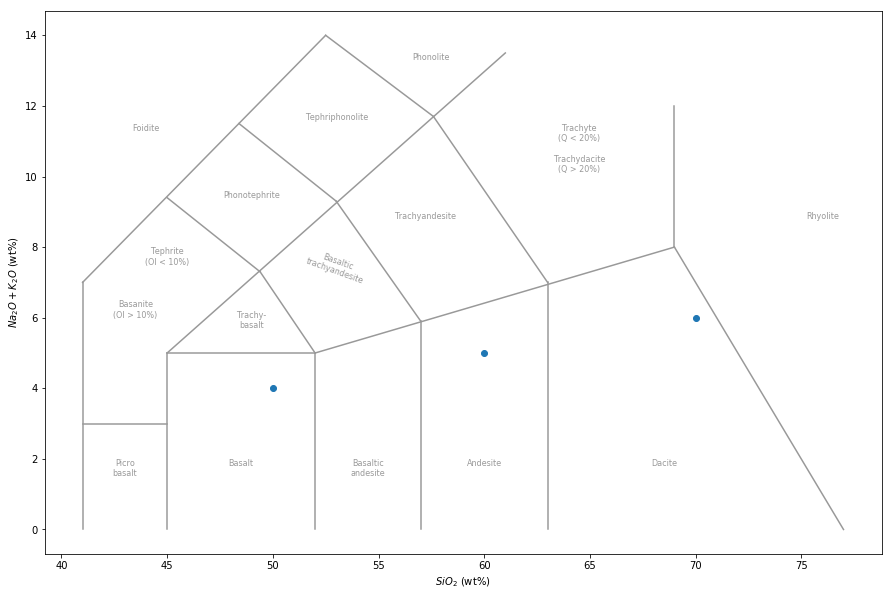

In [5]:
import tasplot
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
silica = [50, 60, 70]
total_alkalis = [4, 5, 6]

ax1 = plt.subplot(111)
tasplot.add_LeMaitre_fields(ax1)
# xlabel
plt.xlabel("$SiO{_2}$ (wt%)")
# ylabel
plt.ylabel("$Na{_2}O + K{_2}O$ (wt%)")

plt.plot(silica, total_alkalis, 'o')
plt.show()

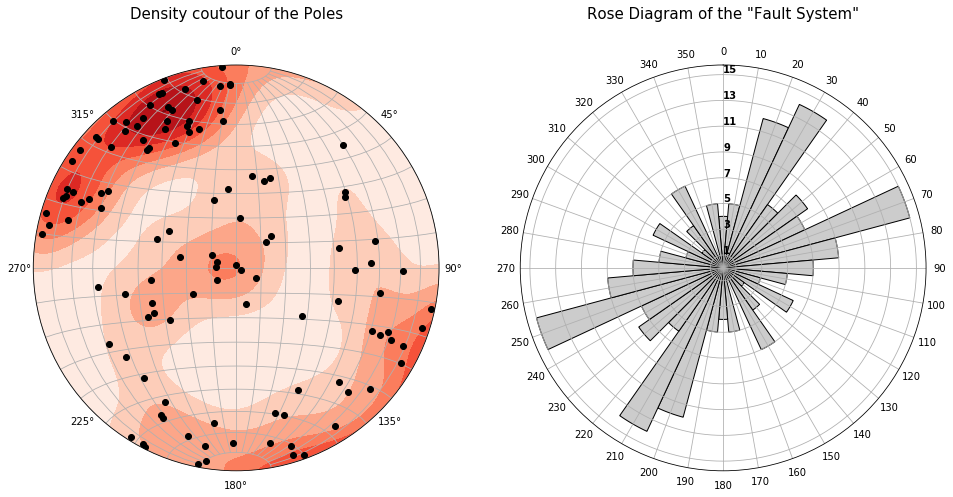

In [6]:
import numpy as np
import mplstereonet
import matplotlib.pyplot as plt


strikes = np.concatenate([np.random.randint(0, 360, 60),
                          np.random.randint(10, 60, 20),
                          np.random.randint(190, 300, 20),
                          np.random.randint(60, 90, 20),
                         ])

dips = np.concatenate([np.random.randint(0, 90, 60),
                       np.random.randint(60, 90, 60),
                         ])

bin_edges = np.arange(-5, 366, 10)
number_of_strikes, bin_edges = np.histogram(strikes, bin_edges)

number_of_strikes[0] += number_of_strikes[-1]

half = np.sum(np.split(number_of_strikes[:-1], 2), 0)
two_halves = np.concatenate([half, half])

fig = plt.figure(figsize=(16,8))

# stereonet
ax = fig.add_subplot(121, projection='stereonet')

ax.pole(strikes, dips, c='k', label='Pole of the Planes')
ax.density_contourf(strikes, dips, measurement='poles', cmap='Reds')
ax.set_title('Density coutour of the Poles', y=1.10, fontsize=15)
ax.grid()

# rose diagram
ax = fig.add_subplot(122, projection='polar')

ax.bar(np.deg2rad(np.arange(0, 360, 10)), two_halves, 
       width=np.deg2rad(10), bottom=0.0, color='.8', edgecolor='k')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_thetagrids(np.arange(0, 360, 10), labels=np.arange(0, 360, 10))
ax.set_rgrids(np.arange(1, two_halves.max() + 1, 2), angle=0, weight= 'black')
ax.set_title('Rose Diagram of the "Fault System"', y=1.10, fontsize=15)
plt.show()
#fig.tight_layout()